# 이미지 분류 - 완전연결층
---
fully connected layer 구현

tensorflow - dense layer

- Fashion Mnist 데이터셋

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle boot']

In [4]:
# 시각화 

samples = np.random.randint(60000, size=9)
samples

array([35204, 20356, 20181, 35461,   597, 24950, 20731,   713, 20419])

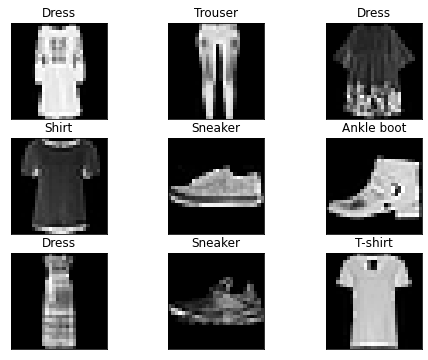

In [5]:
plt.figure(figsize=(8,6))
for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[idx], cmap="gray")
  plt.xticks([])
  plt.yticks([])
  plt.title(class_name[y_train[idx]])

plt.show()

## 검증용 데이터 (Validation Data)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

In [7]:
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)
#데이터가 충분히 많을 때는 검증용 데이터도 나눠서 사용하는 게 좋음 

(42000, 28, 28) (18000, 28, 28)
(42000,) (18000,)


##정규화
- min-Max 정규화

In [8]:
X_train = X_train/255
#255로 안나눠도 됨
X_val = X_val/255
X_test = X_test/255

In [9]:
X_train = X_train.reshape(-1, 28*28)
X_val = X_val.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

X_train.shape

(42000, 784)

In [10]:
# Y 값 one-hot 인코딩 (다중 분류)
from keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

## 모델 생성

In [11]:
#X를 1차원으로 변경해야 모델에 넣을 수 있음
X_train = X_train.reshape(-1, 28 * 28)
X_val = X_val.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

X_train.shape

(42000, 784)

In [12]:
# add convolution layer
# CNN에 넣기 위해서 X의 형태 변경하기
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [13]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = (28,28,1)),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),

    #Dense를 넣기 전에 flatten 해주기
    layers.Flatten(),

    layers.Dense(units=32, activation='relu'),

    #이진 분류 모델: sigmoid 출력층 - 0 or 1
    # 다중 분류: softmax
    layers.Dense(units = 10, activation='softmax'),
])

model.summary()
    
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=["acc"]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

## 학습

In [ ]:
epochs = 30
batch_size = 32

history = model.fit(X_train, y_train_oh, epochs=epochs,
                    batch_size = batch_size, validation_data=(X_val, y_val_oh), verbose=1)

Epoch 1/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5317 - acc: 0.8095 - val_loss: 0.5326 - val_acc: 0.8053
Epoch 2/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3912 - acc: 0.8570 - val_loss: 0.3644 - val_acc: 0.8695
Epoch 3/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3485 - acc: 0.8714 - val_loss: 0.3442 - val_acc: 0.8742
Epoch 4/30
1313/1313 [==============================] - 7s 6ms/step - loss: 0.3222 - acc: 0.8804 - val_loss: 0.3317 - val_acc: 0.8821
Epoch 5/30
1313/1313 [==============================] - 7s 6ms/step - loss: 0.3037 - acc: 0.8858 - val_loss: 0.3382 - val_acc: 0.8792
Epoch 6/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2866 - acc: 0.8929 - val_loss: 0.3395 - val_acc: 0.8789
Epoch 7/30
1313/1313 [==============================] - 7s 6ms/step - loss: 0.2722 - acc: 0.8985 - val_loss: 0.3318 - val_acc: 0.8839
Epoch 8/30
1313/1313 [==============================] - 8s 6ms

## 평가

In [14]:
model.evaluate(X_train, y_train_oh)

1313/1313 [==============================] - 12s 3ms/step - loss: 2.3046 - acc: 0.0412


[2.304622173309326, 0.04116666689515114]

In [15]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 2.3047 - acc: 0.0436


[2.304725408554077, 0.04360000044107437]

## 예측

In [16]:
y_pred = model.predict(X_test)

y_pred

313/313 [==============================] - 1s 2ms/step


array([[0.09963536, 0.09409353, 0.10127699, ..., 0.10117744, 0.10338911,
        0.098612  ],
       [0.10422578, 0.08721381, 0.09871302, ..., 0.09432156, 0.11449641,
        0.09569518],
       [0.10583832, 0.08645729, 0.09937719, ..., 0.09636379, 0.11185668,
        0.09249896],
       ...,
       [0.10626286, 0.09474821, 0.10090237, ..., 0.10085413, 0.10014428,
        0.09178925],
       [0.10409296, 0.08764737, 0.10103106, ..., 0.09252029, 0.10803007,
        0.09353144],
       [0.10278457, 0.09129183, 0.10121621, ..., 0.09948894, 0.10795566,
        0.09540612]], dtype=float32)

In [17]:
#One-hot 전으로 되돌리기 (정답값의 형태로)
y_pred = np.argmax(y_pred, axis=1)

y_pred

array([3, 8, 8, ..., 3, 4, 3])

In [18]:
# confusion matrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
  cfm = confusion_matrix(y_true, y_pred)

  plt.figure(figsize=(5,5))
  sns.heatmap(cfm, annot=True, cbar=False, fmt="d")
  plt.xlabel("Predicted Class")
  plt.ylabel("True Class")
  plt.show()

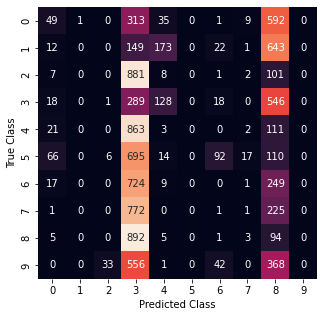

In [19]:
plot_confusion_matrix(y_test, y_pred)


## 오답 이미지 출력

In [20]:
#오답 이미지 출력
samples = np.where((y_test == y_pred) == False)[0]
samples

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [21]:
samples = np.random.choice(samples, 9)
samples

array([6782, 8224, 5298,  266, 5346, 5681, 1298,  611, 7609])

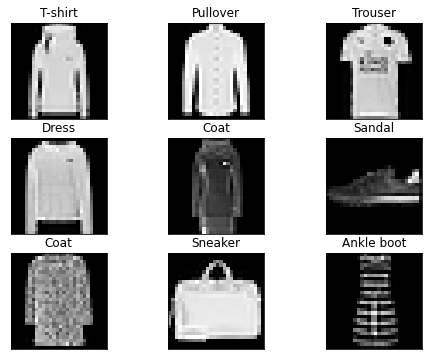

In [22]:
#시각화

plt.figure(figsize=(8,6))

for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
  plt.xticks([])
  plt.yticks([])

  plt.title(class_name[y_test[idx]])

plt.show()